In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df1 = pd.read_excel("Test_set.xlsx")
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
data = df.append(df1,sort=False)

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [7]:
data.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

##feture enginnering

In [8]:
data["date"] = data["Date_of_Journey"].str.split("/").str[0]
data["month"] = data["Date_of_Journey"].str.split("/").str[1]
data["year"] = data["Date_of_Journey"].str.split("/").str[2]

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [10]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
date                object
month               object
year                object
dtype: object

In [11]:
data["date"] = data["date"].astype(int)
data["month"] = data["month"].astype(int)
data["year"] = data["year"].astype(int)

In [12]:
data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
date                 int32
month                int32
year                 int32
dtype: object

In [13]:
data = data.drop("Date_of_Journey",axis=1)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [14]:
data["Arrival_Time"] = data["Arrival_Time"].str.split(" ").str[0]

In [15]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [16]:
data["Total_Stops"] = data["Total_Stops"].fillna('1 stop')

In [17]:
data["Total_Stops"].isnull().sum()

0

In [18]:
data["Total_Stops"] = data["Total_Stops"].replace('non-stop','0 stops')
data["Total_Stops"].head()

0    0 stops
1    2 stops
2    2 stops
3     1 stop
4     1 stop
Name: Total_Stops, dtype: object

In [19]:
data["Stops"] = data["Total_Stops"].str.split(" ").str[0]
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stops,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [20]:
data = data.drop("Total_Stops",axis=1)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,date,month,year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [21]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
date                 int32
month                int32
year                 int32
Stops               object
dtype: object

In [22]:
data["Stops"] = data["Stops"].astype(int)

In [23]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
date                 int32
month                int32
year                 int32
Stops                int32
dtype: object

In [24]:
data["arrival_time_hour"] = data["Arrival_Time"].str.split(":").str[0]
data["arrival_time_minute"] = data["Arrival_Time"].str.split(":").str[1]

In [25]:
data = data.drop("Arrival_Time",axis=1)

In [26]:
data["arrival_time_hour"] = data["arrival_time_hour"].astype(int)
data["arrival_time_minute"] = data["arrival_time_minute"].astype(int)

In [27]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,date,month,year,Stops,arrival_time_hour,arrival_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [28]:
data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Dep_Time                object
Duration                object
Additional_Info         object
Price                  float64
date                     int32
month                    int32
year                     int32
Stops                    int32
arrival_time_hour        int32
arrival_time_minute      int32
dtype: object

In [29]:
data["dep_time_hour"] = data["Dep_Time"].str.split(":").str[0]
data["dep_time_minute"] = data["Dep_Time"].str.split(":").str[1]

In [30]:
data["dep_time_hour"] = data["dep_time_hour"].astype(int)
data["dep_time_minute"] = data["dep_time_minute"].astype(int)

In [31]:
data = data.drop("Dep_Time",axis=1)

In [32]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,date,month,year,Stops,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [33]:
data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Duration                object
Additional_Info         object
Price                  float64
date                     int32
month                    int32
year                     int32
Stops                    int32
arrival_time_hour        int32
arrival_time_minute      int32
dep_time_hour            int32
dep_time_minute          int32
dtype: object

In [34]:
data["route1"] = data["Route"].str.split("→ ").str[0]
data["route2"] = data["Route"].str.split("→ ").str[1]
data["route3"] = data["Route"].str.split("→ ").str[2]
data["route4"] = data["Route"].str.split("→ ").str[3]
data["route5"] = data["Route"].str.split("→ ").str[4]


In [35]:
data.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,date,month,year,Stops,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [36]:
data["Price"].isnull().sum()

2671

In [37]:
data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Duration                object
Additional_Info         object
Price                  float64
date                     int32
month                    int32
year                     int32
Stops                    int32
arrival_time_hour        int32
arrival_time_minute      int32
dep_time_hour            int32
dep_time_minute          int32
route1                  object
route2                  object
route3                  object
route4                  object
route5                  object
dtype: object

In [38]:
data["Price"].fillna(data["Price"].mean(),inplace=True)

In [39]:
data["Price"].isnull().sum()

0

In [40]:
data.dtypes

Airline                 object
Source                  object
Destination             object
Route                   object
Duration                object
Additional_Info         object
Price                  float64
date                     int32
month                    int32
year                     int32
Stops                    int32
arrival_time_hour        int32
arrival_time_minute      int32
dep_time_hour            int32
dep_time_minute          int32
route1                  object
route2                  object
route3                  object
route4                  object
route5                  object
dtype: object

In [41]:
data["route1"].fillna("None",inplace=True)
data["route2"].fillna("None",inplace=True)
data["route3"].fillna("None",inplace=True)
data["route4"].fillna("None",inplace=True)
data["route5"].fillna("None",inplace=True)

In [42]:
data[["route1","route2","route3","route4","route5"]].isnull().sum()

route1    0
route2    0
route3    0
route4    0
route5    0
dtype: int64

In [43]:
data.drop(["Route","Duration"],axis=1,inplace=True)

In [44]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,date,month,year,Stops,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [45]:
data.isnull().sum()

Airline                0
Source                 0
Destination            0
Additional_Info        0
Price                  0
date                   0
month                  0
year                   0
Stops                  0
arrival_time_hour      0
arrival_time_minute    0
dep_time_hour          0
dep_time_minute        0
route1                 0
route2                 0
route3                 0
route4                 0
route5                 0
dtype: int64

In [46]:
data.dtypes

Airline                 object
Source                  object
Destination             object
Additional_Info         object
Price                  float64
date                     int32
month                    int32
year                     int32
Stops                    int32
arrival_time_hour        int32
arrival_time_minute      int32
dep_time_hour            int32
dep_time_minute          int32
route1                  object
route2                  object
route3                  object
route4                  object
route5                  object
dtype: object

In [47]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
data["Airline"] = encode.fit_transform(data["Airline"])
data["Source"] = encode.fit_transform(data["Source"])
data["Destination"] = encode.fit_transform(data["Destination"])
data["Additional_Info"] = encode.fit_transform(data["Additional_Info"])
data["route1"] = encode.fit_transform(data["route1"])
data["route2"] = encode.fit_transform(data["route2"])
data["route3"] = encode.fit_transform(data["route3"])
data["route4"] = encode.fit_transform(data["route4"])
data["route5"] = encode.fit_transform(data["route5"])


In [48]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,date,month,year,Stops,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute,route1,route2,route3,route4,route5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [49]:
data.dtypes

Airline                  int32
Source                   int32
Destination              int32
Additional_Info          int32
Price                  float64
date                     int32
month                    int32
year                     int32
Stops                    int32
arrival_time_hour        int32
arrival_time_minute      int32
dep_time_hour            int32
dep_time_minute          int32
route1                   int32
route2                   int32
route3                   int32
route4                   int32
route5                   int32
dtype: object

In [50]:
data.head()

,Airline,Source,Destination,Additional_Info,Price,date,month,year,Stops,arrival_time_hour,arrival_time_minute,dep_time_hour,dep_time_minute,route1,route2,route3,route4,route5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,34,8,12,4


In [51]:
import matplotlib.pyplot as plt
import seaborn as sn
from mpl_toolkits.mplot3d import axes3d 

##lets make some data visualization

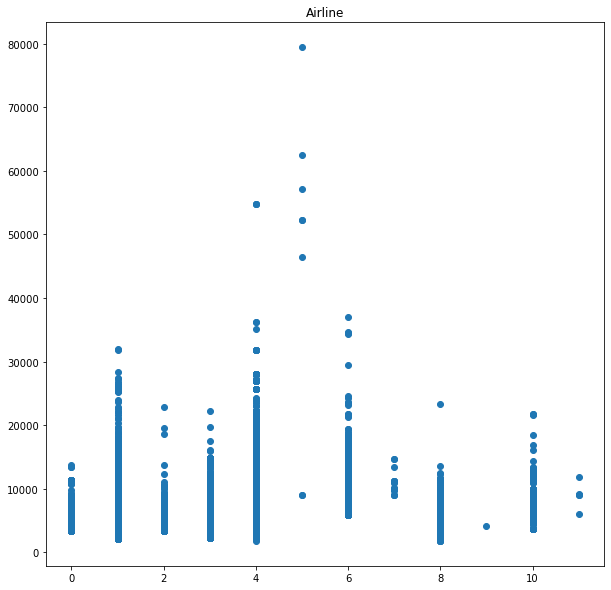

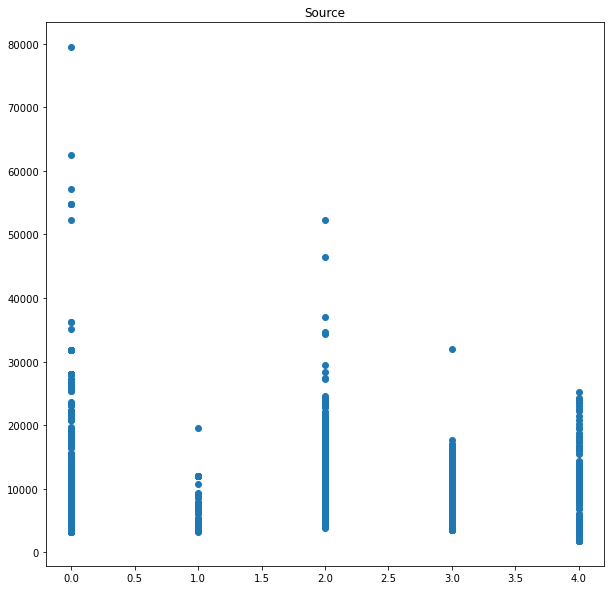

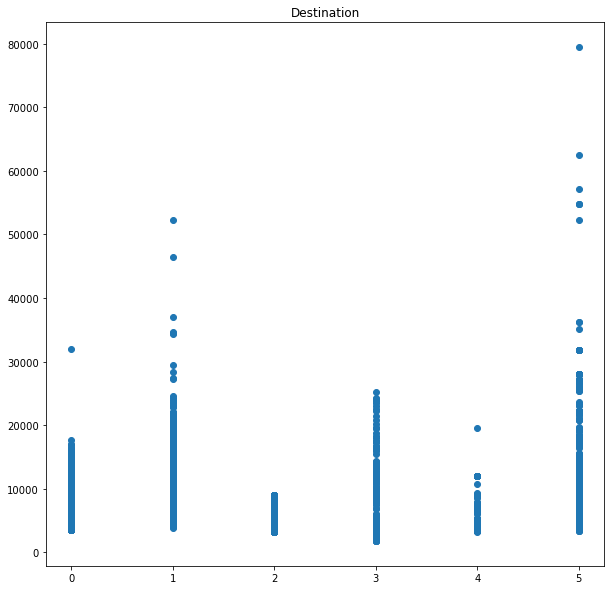

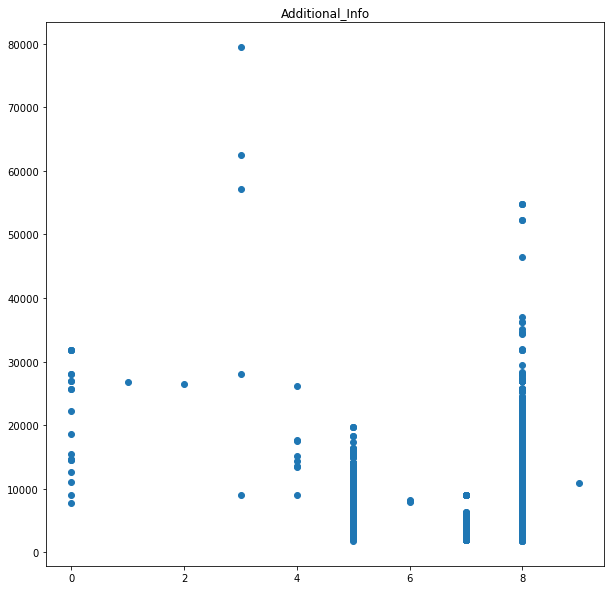

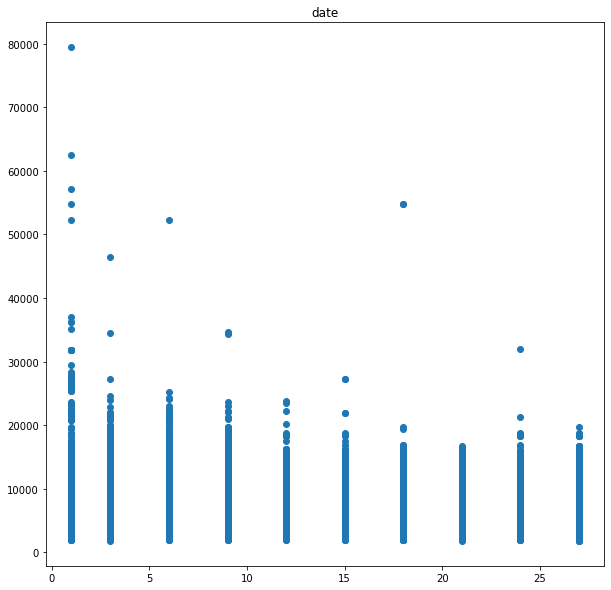

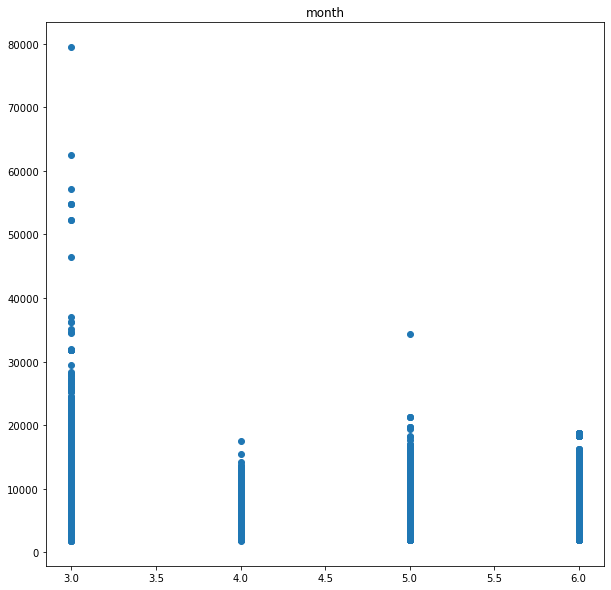

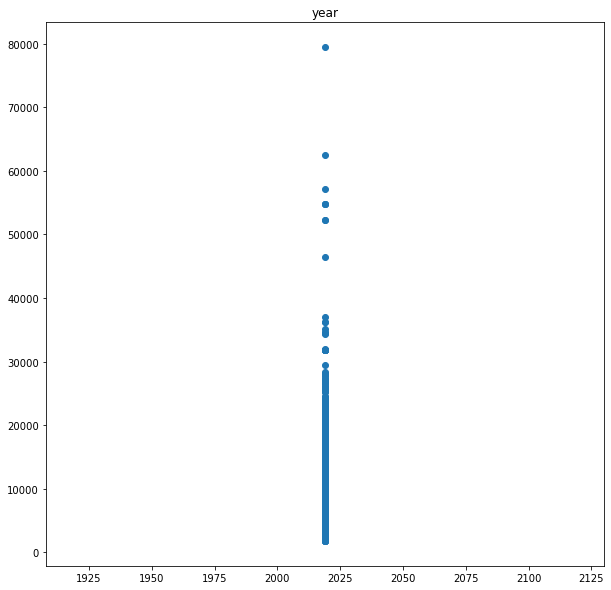

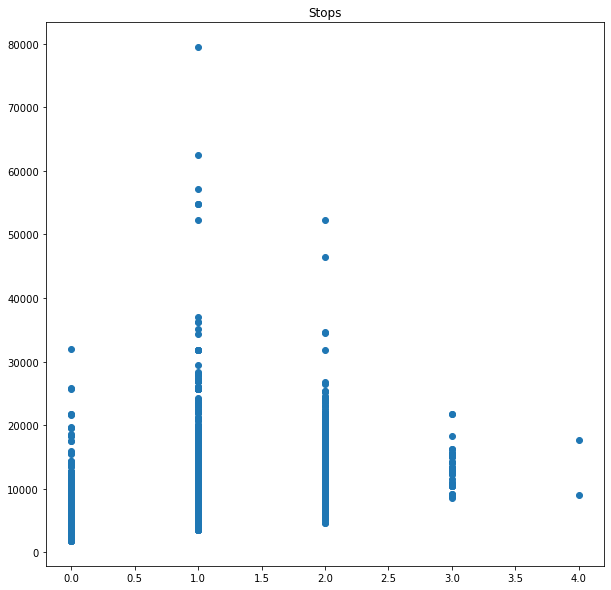

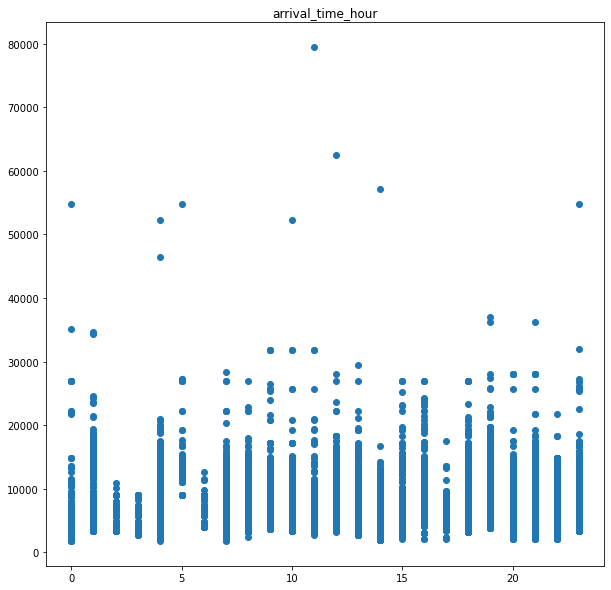

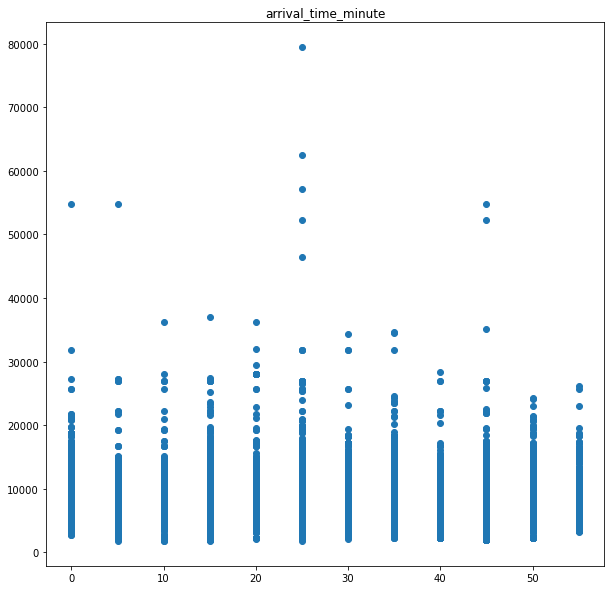

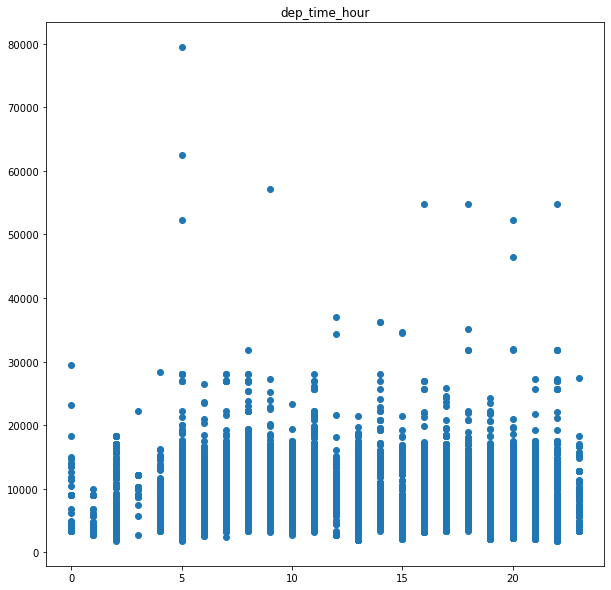

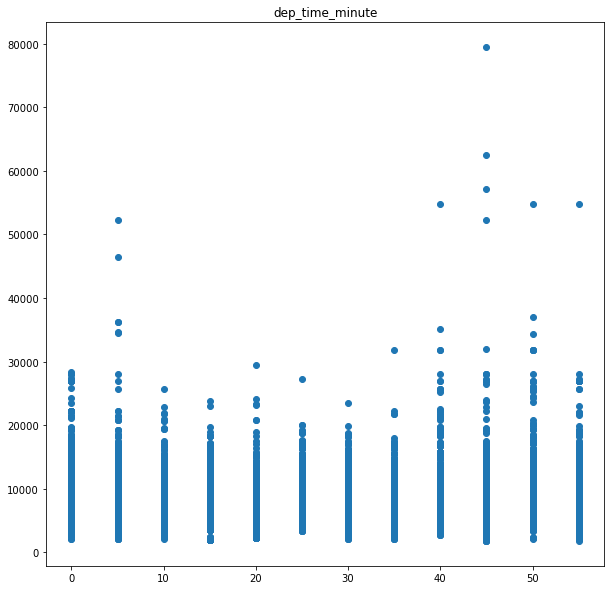

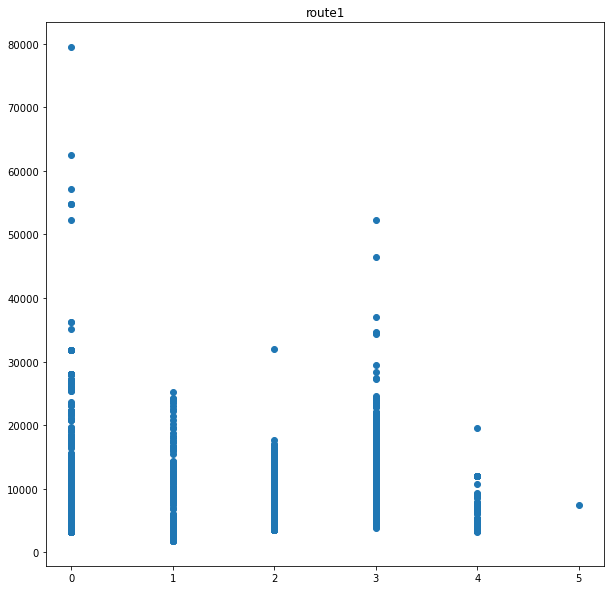

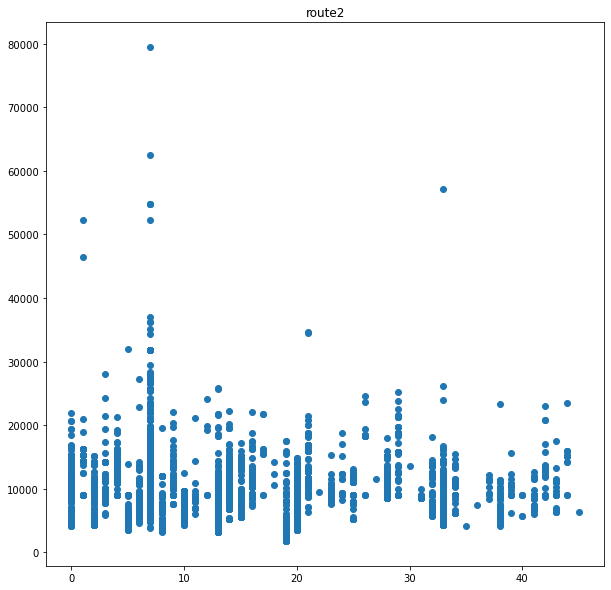

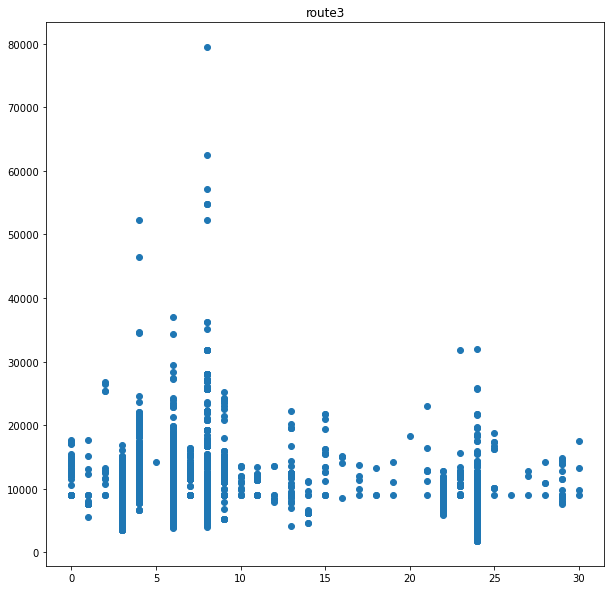

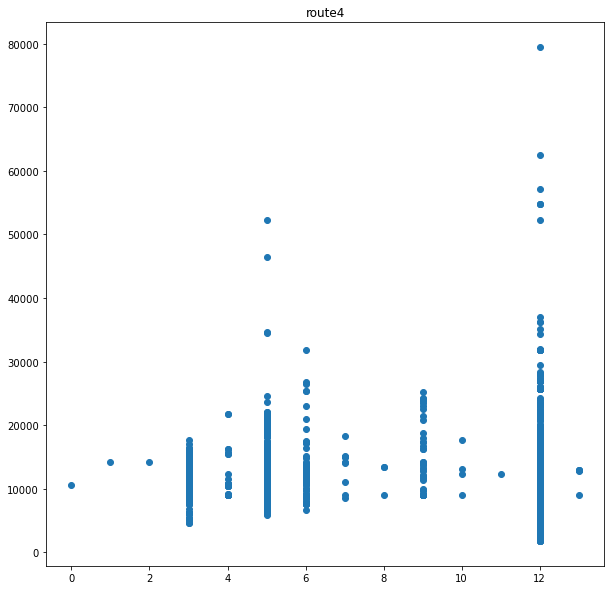

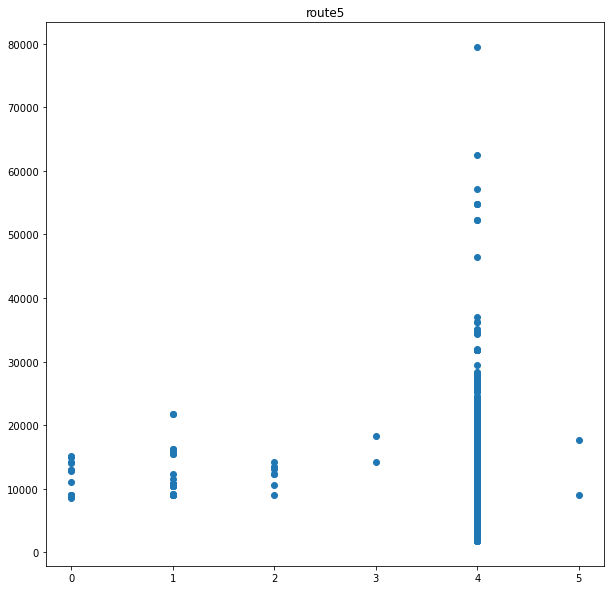

In [52]:
for feature in data.columns:
    if feature!="Price":
        plt.figure(figsize=[10,10])
        plt.scatter(data[feature],data["Price"])
        plt.title(feature)
        plt.show()

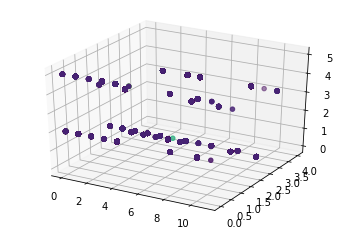

In [53]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(data["Airline"],data["Source"],data["Destination"],c=data["Price"])

In [54]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [55]:
train = data[0:10683]
test = data[10683:]

In [56]:
x = train.drop("Price",axis=1)
y = train.Price

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [58]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [59]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [60]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [61]:
selected_models = x_train.columns[(model.get_support())]
selected_models

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'date', 'month',
       'Stops', 'arrival_time_hour', 'arrival_time_minute', 'dep_time_hour',
       'dep_time_minute', 'route1', 'route2', 'route3', 'route4', 'route5'],
      dtype='object')

In [62]:
x_train = x_train.drop("year",axis=1)
x_test = x_test.drop("year",axis=1)

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
from sklearn.model_selection import RandomizedSearchCV
estimators = [int(x) for x in np.linspace(start=10,stop=1000,num=50)]

In [65]:
random = {'n_estimators':estimators}

In [66]:
reg = RandomForestRegressor()

In [69]:
rf = RandomizedSearchCV(estimator=reg,param_distributions=random,n_iter=10,cv=5,random_state=0,verbose=2,scoring='neg_mean_squared_error')

In [70]:
rf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=575 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. n_estimators=575, total=   7.2s
[CV] n_estimators=575 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s


[CV] ................................. n_estimators=575, total=   7.1s
[CV] n_estimators=575 ................................................
[CV] ................................. n_estimators=575, total=   7.1s
[CV] n_estimators=575 ................................................
[CV] ................................. n_estimators=575, total=   7.1s
[CV] n_estimators=575 ................................................
[CV] ................................. n_estimators=575, total=   8.9s
[CV] n_estimators=232 ................................................
[CV] ................................. n_estimators=232, total=   3.7s
[CV] n_estimators=232 ................................................
[CV] ................................. n_estimators=232, total=   3.2s
[CV] n_estimators=232 ................................................
[CV] ................................. n_estimators=232, total=   3.2s
[CV] n_estimators=232 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'n_estimators': [10, 30, 50, 70, 90,
                                                         111, 131, 151, 171,
                                                         191, 212, 232, 252,
                                                         272, 292, 313, 333,
                                                         353, 373, 393, 414,
                                                         434, 454, 474, 494,
                                                         515, 535, 555, 575,
                                                         595, ...]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [72]:
y_predict = rf.predict(x_test)
y_predict

array([ 6196.59427208,  3883.21957041, 11815.39856802, ...,
       11717.68675418, 14242.28878282,  7912.62291169])

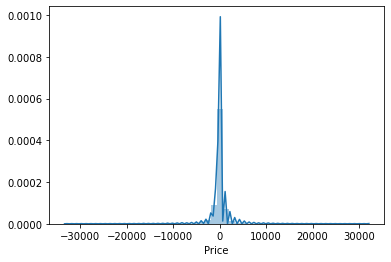

In [75]:
sn.distplot(y_test-y_predict)

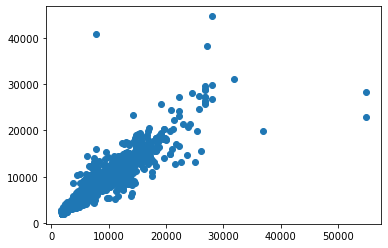

In [76]:
plt.scatter(y_test,y_predict)